In [26]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression

In [34]:
%run ../Iron_Oliver.ipynb

In [28]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.txt')

In [29]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [30]:
Numericals = data.select_dtypes(np.number)

In [7]:
Numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
type(Numericals.columns)

pandas.core.indexes.base.Index

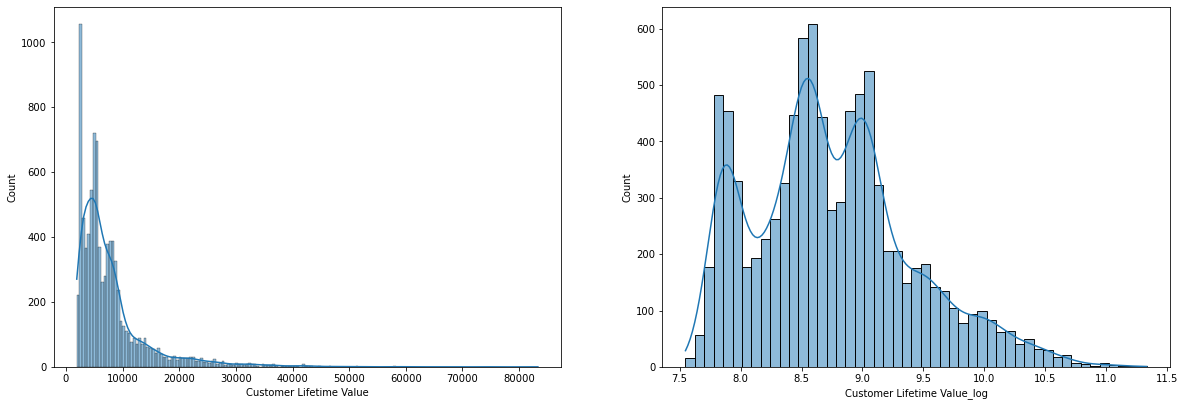

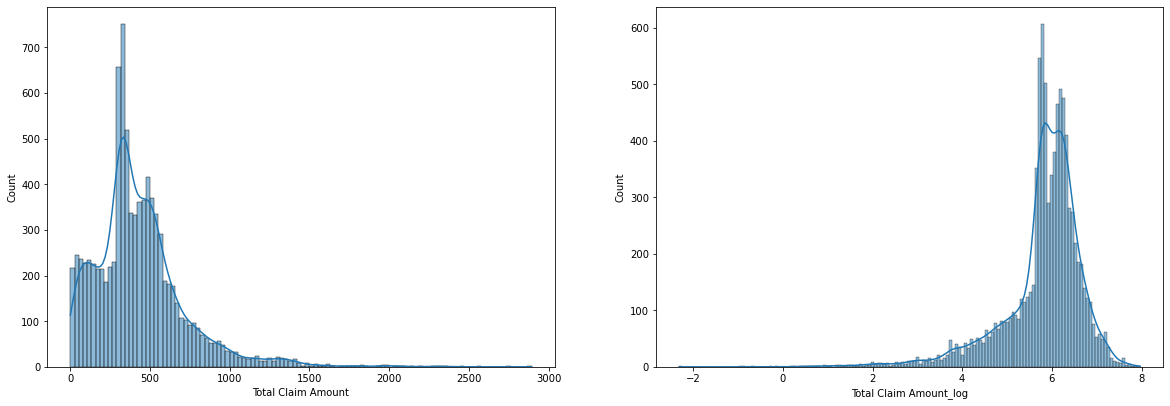

In [35]:
compare_log_transform(Numericals,['Customer Lifetime Value','Total Claim Amount'])

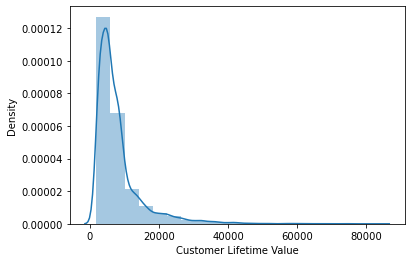

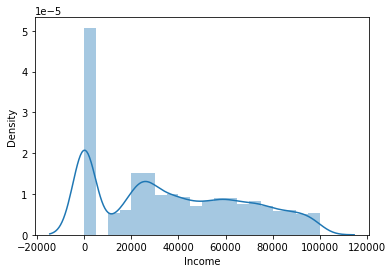

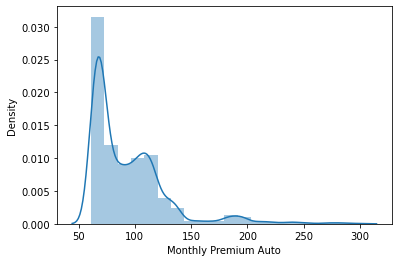

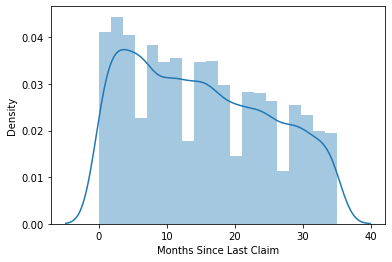

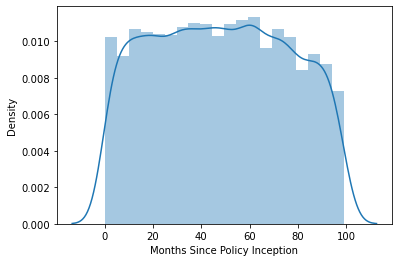

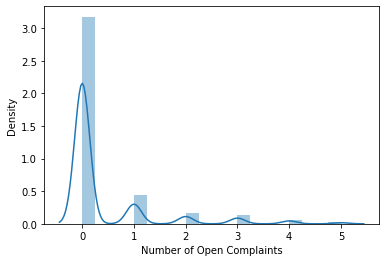

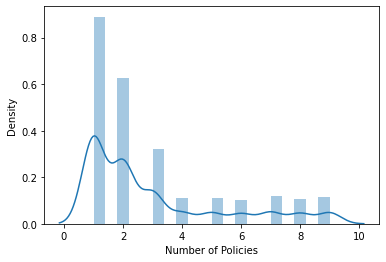

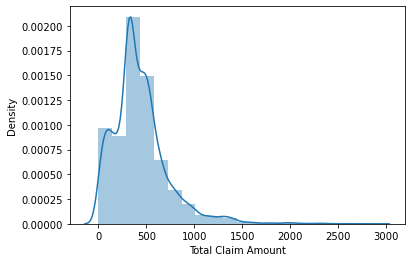

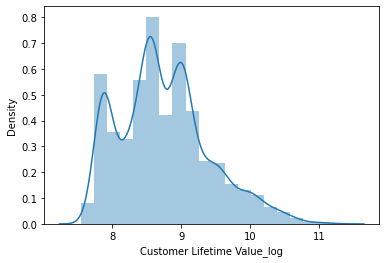

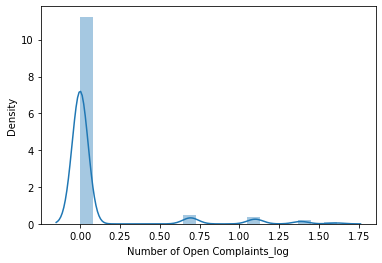

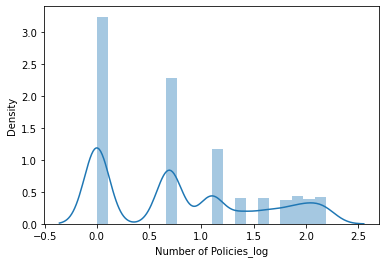

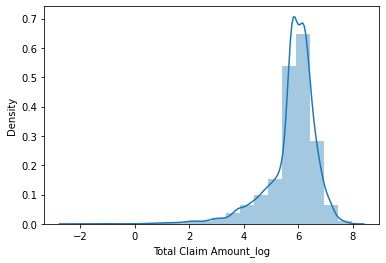

In [25]:
#after log transform, customer lifetime value changed from more likely exponential distribution to an normal distribution
#after log transform, number of open complains & number of policies still looks like exponential distribution
#after log transform, total claim amount values change from more like exponential dist to an normal dist
for val in list(Numericals.columns):
    sns.distplot(Numericals[val], bins = 20)
    plt.show()

In [ ]:
#To have mutliple plots next to each other:
 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,2)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.distplot(data['total_cla'], hist=True, bins = 100, ax=ax1) 
probplot(data['total_cla'], plot=ax2) 
data.boxplot('total_cla', ax=ax3)

In [16]:
Numericals['Customer Lifetime Value_log'] = list(map(log_transform_clean,Numericals['Customer Lifetime Value']))

In [19]:
Numericals['Number of Open Complaints_log'] = list(map(log_transform_clean,Numericals['Number of Open Complaints']))

In [21]:
Numericals['Number of Policies_log'] = list(map(log_transform_clean,Numericals['Number of Policies']))

In [23]:
Numericals['Total Claim Amount_log'] = list(map(log_transform_clean,Numericals['Total Claim Amount']))

In [ ]:
# xt, lmbda = stats.boxcox(X_num['Monthly Premium Auto'])